In [2]:
#importing libraries
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import time
import os

In [5]:
#list of filenames and directories within that path.
print(os.listdir('C:\\Users\\admin\\Desktop\\project'))


['archive.zip', 'bgi.png', 'corrected', 'corrected.gz', 'kddcup.data', 'kddcup.data.corrected', 'kddcup.data.gz', 'kddcup.data_10_percent', 'kddcup.data_10_percent.gz', 'kddcup.data_10_percent_corrected', 'kddcup.names', 'kddcup.newtestdata_10_percent_unlabeled', 'kddcup.newtestdata_10_percent_unlabeled.gz', 'kddcup.testdata.unlabeled', 'kddcup.testdata.unlabeled.gz', 'kddcup.testdata.unlabeled_10_percent', 'kddcup.testdata.unlabeled_10_percent.gz', 'logo.png', 'training_attack_types', 'typo-correction.txt']


In [6]:
#opens a file named "kddcup.names" located at the path and prints
with open("C:\\Users\\admin\\Desktop\\project\\kddcup.names",'r') as f:
    print(f.read())

back,buffer_overflow,ftp_write,guess_passwd,imap,ipsweep,land,loadmodule,multihop,neptune,nmap,normal,perl,phf,pod,portsweep,rootkit,satan,smurf,spy,teardrop,warezclient,warezmaster.
duration: continuous.
protocol_type: symbolic.
service: symbolic.
flag: symbolic.
src_bytes: continuous.
dst_bytes: continuous.
land: symbolic.
wrong_fragment: continuous.
urgent: continuous.
hot: continuous.
num_failed_logins: continuous.
logged_in: symbolic.
num_compromised: continuous.
root_shell: continuous.
su_attempted: continuous.
num_root: continuous.
num_file_creations: continuous.
num_shells: continuous.
num_access_files: continuous.
num_outbound_cmds: continuous.
is_host_login: symbolic.
is_guest_login: symbolic.
count: continuous.
srv_count: continuous.
serror_rate: continuous.
srv_serror_rate: continuous.
rerror_rate: continuous.
srv_rerror_rate: continuous.
same_srv_rate: continuous.
diff_srv_rate: continuous.
srv_diff_host_rate: continuous.
dst_host_count: continuous.
dst_host_srv_count: con

In [7]:
#parses a comma-separated string of column names and adds an additional column named 'target' to the list of columns. 
cols="""duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,
hot,num_failed_logins,logged_in,num_compromised,root_shell,su_attempted,num_root,num_file_creations,
num_shells,num_access_files,num_outbound_cmds,is_host_login,is_guest_login,count,srv_count,serror_rate,srv_serror_rate,
rerror_rate,srv_rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,
dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,
dst_host_rerror_rate,dst_host_srv_rerror_rate"""

columns=[]
for c in cols.split(','):
    if(c.strip()):
       columns.append(c.strip())
columns.append('target')
print(len(columns))

42


In [8]:
print(columns)

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_host_login', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'target']


In [9]:

with open("C:\\Users\\admin\\Desktop\\project\\training_attack_types",'r') as f:
    print(f.read())

back dos
buffer_overflow u2r
ftp_write r2l
guess_passwd r2l
imap r2l
ipsweep probe
land dos
loadmodule u2r
multihop r2l
neptune dos
nmap probe
perl u2r
phf r2l
pod dos
portsweep probe
rootkit u2r
satan probe
smurf dos
spy r2l
teardrop dos
warezclient r2l
warezmaster r2l




In [10]:
attack_types = {'normal': 'normal','back': 'dos','buffer_overflow': 'u2r','ftp_write': 'r2l',
'guess_passwd': 'r2l','imap': 'r2l','ipsweep': 'probe','land': 'dos','loadmodule': 'u2r',
'multihop': 'r2l','neptune': 'dos','nmap': 'probe','perl': 'u2r','phf': 'r2l','pod': 'dos',
'portsweep': 'probe','rootkit': 'u2r','satan': 'probe','smurf': 'dos','spy': 'r2l','teardrop': 'dos','warezclient': 'r2l',
'warezmaster': 'r2l',}

In [11]:
#----------------------READING DATASET----------------------

In [12]:
#specifies the path and read the dataframe
path = ("C:\\Users\\admin\\Desktop\\project\\kddcup.data_10_percent.gz")
data = pd.read_csv(path,names=columns)

#Adding Attack Type column in the DataFrame by applying a lambda function
data['Attack Type'] = data.target.apply(lambda r:attack_types[r[:-1]])

data.head()#displaying few rows of the dataframe

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,...,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,0,0,...,1.0,0.0,0.11,0.0,0.0,0.0,0.0,0.0,normal.,normal
1,0,tcp,http,SF,239,486,0,0,0,0,...,1.0,0.0,0.05,0.0,0.0,0.0,0.0,0.0,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,0,0,...,1.0,0.0,0.03,0.0,0.0,0.0,0.0,0.0,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,0,0,...,1.0,0.0,0.02,0.0,0.0,0.0,0.0,0.0,normal.,normal


In [13]:
data.shape 

(494021, 43)

In [14]:
#counting the occurrences of each unique value in the 'target' column of the DataFrame
data['target'].value_counts()

target
smurf.              280790
neptune.            107201
normal.              97278
back.                 2203
satan.                1589
ipsweep.              1247
portsweep.            1040
warezclient.          1020
teardrop.              979
pod.                   264
nmap.                  231
guess_passwd.           53
buffer_overflow.        30
land.                   21
warezmaster.            20
imap.                   12
rootkit.                10
loadmodule.              9
ftp_write.               8
multihop.                7
phf.                     4
perl.                    3
spy.                     2
Name: count, dtype: int64

In [15]:
data['Attack Type'].value_counts()

Attack Type
dos       391458
normal     97278
probe       4107
r2l         1126
u2r           52
Name: count, dtype: int64

In [16]:
#visualizing each columns datatype
data.dtypes

duration                         int64
protocol_type                   object
service                         object
flag                            object
src_bytes                        int64
dst_bytes                        int64
land                             int64
wrong_fragment                   int64
urgent                           int64
hot                              int64
num_failed_logins                int64
logged_in                        int64
num_compromised                  int64
root_shell                       int64
su_attempted                     int64
num_root                         int64
num_file_creations               int64
num_shells                       int64
num_access_files                 int64
num_outbound_cmds                int64
is_host_login                    int64
is_guest_login                   int64
count                            int64
srv_count                        int64
serror_rate                    float64
srv_serror_rate          

In [17]:
# --------------data preprocessing--------------------------- 

In [18]:
#finding null value in datframe
data.isnull().sum()


duration                       0
protocol_type                  0
service                        0
flag                           0
src_bytes                      0
dst_bytes                      0
land                           0
wrong_fragment                 0
urgent                         0
hot                            0
num_failed_logins              0
logged_in                      0
num_compromised                0
root_shell                     0
su_attempted                   0
num_root                       0
num_file_creations             0
num_shells                     0
num_access_files               0
num_outbound_cmds              0
is_host_login                  0
is_guest_login                 0
count                          0
srv_count                      0
serror_rate                    0
srv_serror_rate                0
rerror_rate                    0
srv_rerror_rate                0
same_srv_rate                  0
diff_srv_rate                  0
srv_diff_h

In [19]:
#Finding categorical features
numcols= data._get_numeric_data().columns

In [20]:
cols = list(set(data.columns)-set(numcols))
cols.remove('target')
cols.remove('Attack Type')

cols

['protocol_type', 'service', 'flag']

In [21]:
#CATEGORICAL FEATURES DISTRIBUTION

In [22]:
#Visualization
def bar_graph(feature):
    data[feature].value_counts().plot(kind="bar")


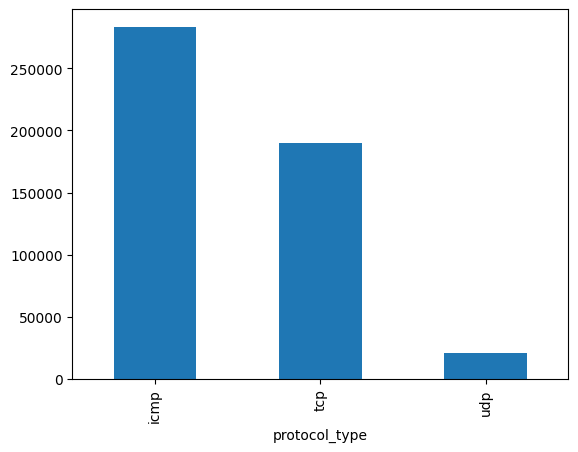

In [23]:
bar_graph('protocol_type')

In [24]:
#Protocol type: We notice that ICMP is the most present in the used data

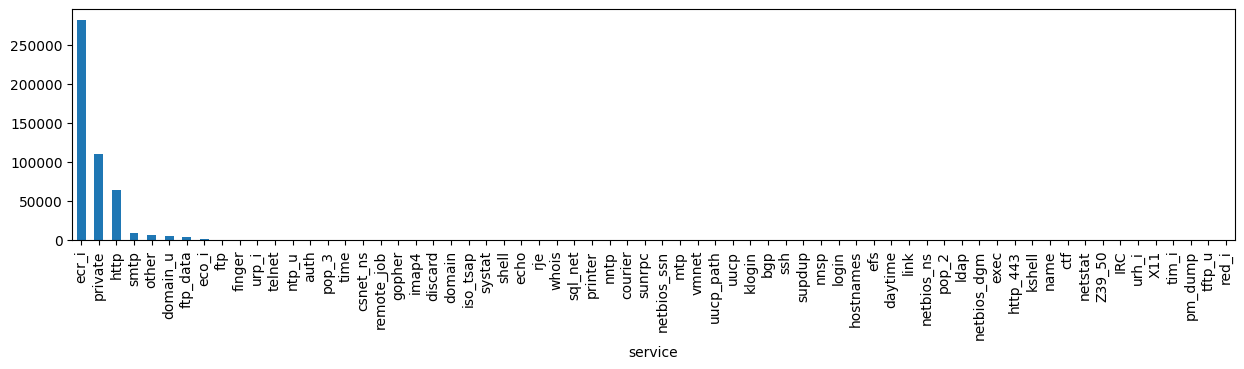

In [25]:
plt.figure(figsize=(15,3))
bar_graph('service')


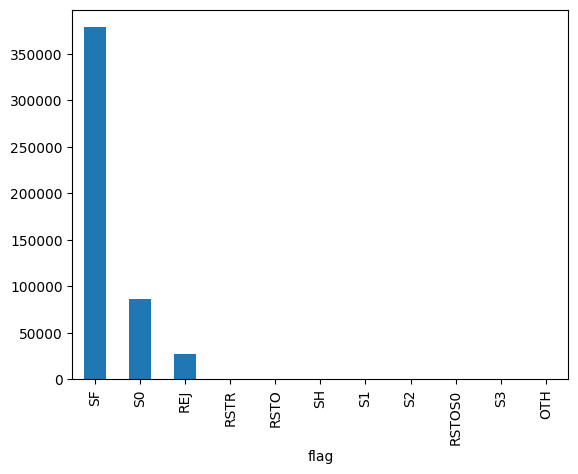

In [26]:
bar_graph('flag')

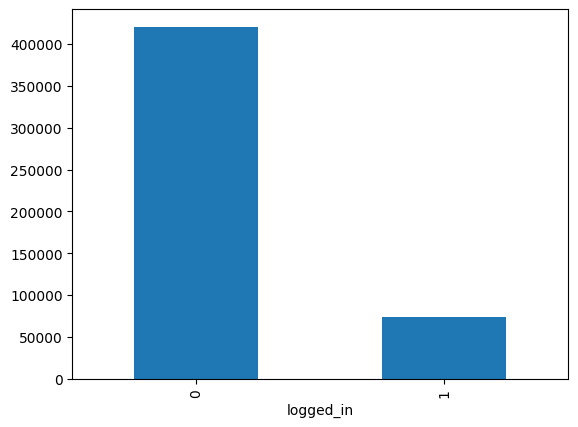

In [27]:
bar_graph('logged_in')

In [28]:
#logged_in (1 if successfully logged in; 0 otherwise

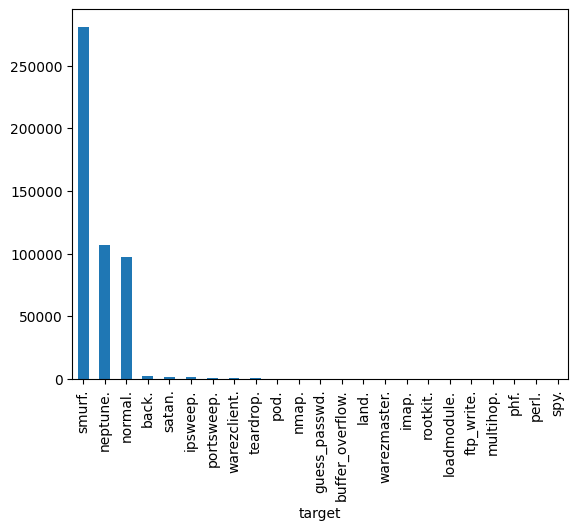

In [29]:
bar_graph('target')

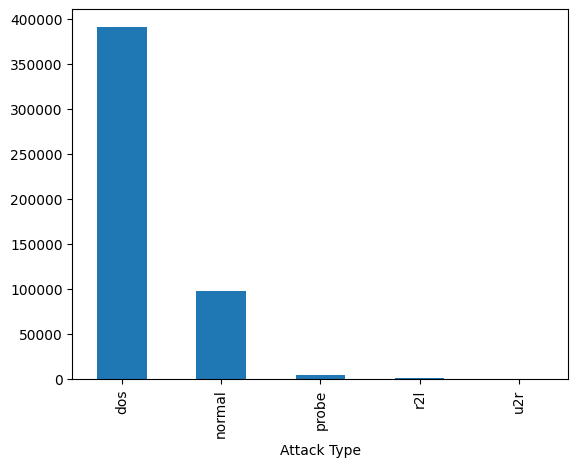

In [30]:
bar_graph('Attack Type')

In [31]:
data.columns

Index(['duration', 'protocol_type', 'service', 'flag', 'src_bytes',
       'dst_bytes', 'land', 'wrong_fragment', 'urgent', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'num_outbound_cmds', 'is_host_login',
       'is_guest_login', 'count', 'srv_count', 'serror_rate',
       'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate',
       'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count',
       'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'Attack Type'],
      dtype='object')

In [32]:
print(len(columns))

42


In [33]:
#DATA CORRELATION

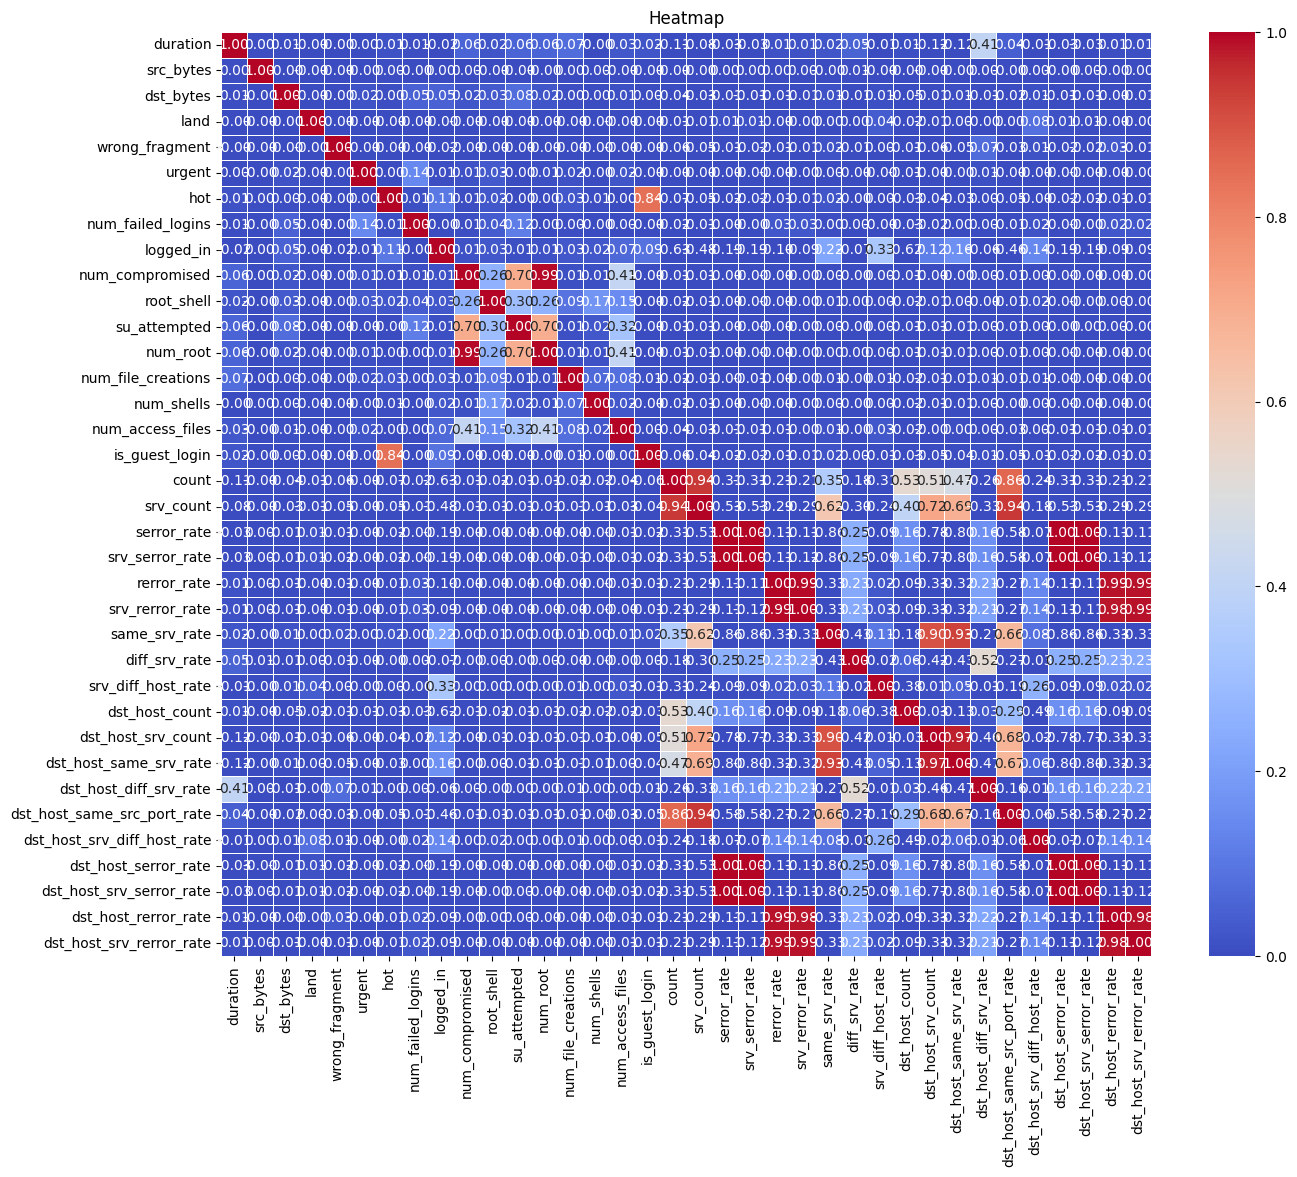

In [34]:
#remove columns from data that have constant values
data = data[[col for col in data if data[col].nunique() > 1]]

#creating duplicate data 
data_duplicate=data.copy()
data_duplicate.head()

#removing  categorical columns from data
string_columns = data_duplicate.select_dtypes(include='object').columns
data_duplicate = data_duplicate.drop(columns=string_columns)

#calculating correlaation matrix fro the numerical columns and plot a heatmap to visualise
corr = data_duplicate.corr()
plt.figure(figsize=(15,12))
sns.heatmap(corr, cmap="coolwarm", annot=True, fmt=".2f", linewidths=0.5, vmin=0, vmax=1)
plt.title("Heatmap")
plt.show()


In [35]:
# Positive correlations are shown in warm colors (reds) while negative correlations are shown in cool colors (blues).

In [36]:
data_duplicate['num_root'].corr(data['num_compromised'])

0.9938277978737942

In [37]:
data_duplicate['srv_count'].corr(data['count'])

0.9436670688882602

In [38]:
data_duplicate['srv_serror_rate'].corr(data['serror_rate'])

0.998361507272552

In [39]:
data_duplicate['srv_rerror_rate'].corr(data['rerror_rate'])

0.9947309539818258

In [40]:
data_duplicate['dst_host_same_srv_rate'].corr(data['dst_host_srv_count'])

0.9736854572954081

In [41]:
data_duplicate['dst_host_srv_serror_rate'].corr(data['dst_host_serror_rate'])

0.9981559173372515

In [42]:
data_duplicate['dst_host_srv_rerror_rate'].corr(data['dst_host_rerror_rate'])

0.9848038371110593

In [43]:
data_duplicate['dst_host_same_srv_rate'].corr(data['same_srv_rate'])

0.927808034269101

In [44]:
data_duplicate['dst_host_srv_count'].corr(data['same_srv_rate'])

0.8989546630324231

In [45]:
data_duplicate['dst_host_same_src_port_rate'].corr(data['srv_count'])

0.9449263676783239

In [46]:
data_duplicate['dst_host_serror_rate'].corr(data['serror_rate'])

0.998672968010501

In [47]:
data_duplicate['dst_host_serror_rate'].corr(data['srv_serror_rate'])

0.997835300373953

In [48]:
data_duplicate['dst_host_srv_serror_rate'].corr(data['serror_rate'])

0.9978492485679238

In [49]:
data_duplicate['dst_host_srv_serror_rate'].corr(data['srv_serror_rate'])

0.9993041091850208

In [50]:
data_duplicate['dst_host_rerror_rate'].corr(data['rerror_rate'])

0.9869947924955924

In [51]:
data_duplicate['dst_host_rerror_rate'].corr(data['srv_rerror_rate'])

0.9821663427308904

In [52]:
data_duplicate['dst_host_srv_rerror_rate'].corr(data['rerror_rate'])

0.9851995540751091

In [53]:
data_duplicate['dst_host_srv_rerror_rate'].corr(data['srv_rerror_rate'])

0.9865705438845588

In [54]:
#This variable is highly correlated and should be ignored for analysis.

In [55]:
data_duplicate.drop('num_root',axis = 1,inplace = True)                   #0.9938277978737942

data_duplicate.drop('srv_serror_rate',axis = 1,inplace = True)            #0.998361507272552

data_duplicate.drop('srv_rerror_rate',axis = 1, inplace=True)             #0.9947309539818258

data_duplicate.drop('dst_host_srv_serror_rate',axis = 1, inplace=True)    #0.9981559173372515

data_duplicate.drop('dst_host_serror_rate',axis = 1, inplace=True)        #0.998672968010501

data_duplicate.drop('dst_host_rerror_rate',axis = 1, inplace=True)        #0.9869947924955924

data_duplicate.drop('dst_host_srv_rerror_rate',axis = 1, inplace=True)    #0.9993041091850208

data_duplicate.drop('dst_host_same_srv_rate',axis = 1, inplace=True)      #0.9736854572954081

In [56]:
data_duplicate.head()

,duration,src_bytes,dst_bytes,land,wrong_fragment,urgent,hot,num_failed_logins,logged_in,num_compromised,...,serror_rate,rerror_rate,same_srv_rate,diff_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate
0,0,181,5450,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,9,9,0.0,0.11,0.0
1,0,239,486,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,19,19,0.0,0.05,0.0
2,0,235,1337,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,29,29,0.0,0.03,0.0
3,0,219,1337,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,39,39,0.0,0.03,0.0
4,0,217,2032,0,0,0,0,0,1,0,...,0.0,0.0,1.0,0.0,0.0,49,49,0.0,0.02,0.0


In [57]:
data_duplicate.columns

Index(['duration', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment',
       'urgent', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised',
       'root_shell', 'su_attempted', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'rerror_rate', 'same_srv_rate', 'diff_srv_rate',
       'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate'],
      dtype='object')

In [58]:
#calculates the standard deviation for each numerical column in the Data
data_duplicate_std = data_duplicate.std()
data_duplicate_std = data_duplicate_std.sort_values(ascending=True)
data_duplicate_std


urgent                              0.005510
land                                0.006673
su_attempted                        0.007793
root_shell                          0.010551
num_shells                          0.011020
num_failed_logins                   0.015520
num_access_files                    0.036482
is_guest_login                      0.037211
dst_host_srv_diff_host_rate         0.042133
diff_srv_rate                       0.082205
num_file_creations                  0.096416
dst_host_diff_srv_rate              0.109259
wrong_fragment                      0.134805
srv_diff_host_rate                  0.142397
rerror_rate                         0.231623
logged_in                           0.355345
serror_rate                         0.380717
same_srv_rate                       0.388189
dst_host_same_src_port_rate         0.481309
hot                                 0.782103
num_compromised                     1.798326
dst_host_count                     64.745380
dst_host_s

In [59]:
#drop  columns with small standard deviations if they are not considered informative or relevant for your analysis

In [60]:
data=data.drop(['num_root','srv_serror_rate','srv_rerror_rate','dst_host_srv_serror_rate','dst_host_serror_rate',
                 'dst_host_rerror_rate','dst_host_srv_rerror_rate','dst_host_same_srv_rate','urgent','land','su_attempted',
                'root_shell','num_shells' ,'num_failed_logins' ,'num_access_files' ,'is_guest_login','dst_host_srv_diff_host_rate','diff_srv_rate' ,'num_file_creations'],axis=1)

In [61]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,serror_rate,rerror_rate,same_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,target,Attack Type
0,0,tcp,http,SF,181,5450,0,0,1,0,...,0.0,0.0,1.0,0.0,9,9,0.0,0.11,normal.,normal
1,0,tcp,http,SF,239,486,0,0,1,0,...,0.0,0.0,1.0,0.0,19,19,0.0,0.05,normal.,normal
2,0,tcp,http,SF,235,1337,0,0,1,0,...,0.0,0.0,1.0,0.0,29,29,0.0,0.03,normal.,normal
3,0,tcp,http,SF,219,1337,0,0,1,0,...,0.0,0.0,1.0,0.0,39,39,0.0,0.03,normal.,normal
4,0,tcp,http,SF,217,2032,0,0,1,0,...,0.0,0.0,1.0,0.0,49,49,0.0,0.02,normal.,normal


In [62]:
#Feature mapping

In [63]:
data['protocol_type'].value_counts()

protocol_type
icmp    283602
tcp     190065
udp      20354
Name: count, dtype: int64

In [64]:
#protocol_type feature mapping
pmap = {'icmp':0,'tcp':1,'udp':2}
data['protocol_type'] = data['protocol_type'].map(pmap)


In [65]:
data['flag'].value_counts()

flag
SF        378440
S0         87007
REJ        26875
RSTR         903
RSTO         579
SH           107
S1            57
S2            24
RSTOS0        11
S3            10
OTH            8
Name: count, dtype: int64

In [66]:
#flag feature mapping
fmap = {'SF':0,'S0':1,'REJ':2,'RSTR':3,'RSTO':4,'SH':5 ,'S1':6 ,'S2':7,'RSTOS0':8,'S3':9 ,'OTH':10}
data['flag'] = data['flag'].map(fmap)


In [67]:
data.head()

,duration,protocol_type,service,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,...,serror_rate,rerror_rate,same_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,target,Attack Type
0,0,1,http,0,181,5450,0,0,1,0,...,0.0,0.0,1.0,0.0,9,9,0.0,0.11,normal.,normal
1,0,1,http,0,239,486,0,0,1,0,...,0.0,0.0,1.0,0.0,19,19,0.0,0.05,normal.,normal
2,0,1,http,0,235,1337,0,0,1,0,...,0.0,0.0,1.0,0.0,29,29,0.0,0.03,normal.,normal
3,0,1,http,0,219,1337,0,0,1,0,...,0.0,0.0,1.0,0.0,39,39,0.0,0.03,normal.,normal
4,0,1,http,0,217,2032,0,0,1,0,...,0.0,0.0,1.0,0.0,49,49,0.0,0.02,normal.,normal


In [68]:
data.drop('service',axis = 1,inplace= True)

In [69]:
data.shape


(494021, 21)

In [70]:
data.head()

,duration,protocol_type,flag,src_bytes,dst_bytes,wrong_fragment,hot,logged_in,num_compromised,count,...,serror_rate,rerror_rate,same_srv_rate,srv_diff_host_rate,dst_host_count,dst_host_srv_count,dst_host_diff_srv_rate,dst_host_same_src_port_rate,target,Attack Type
0,0,1,0,181,5450,0,0,1,0,8,...,0.0,0.0,1.0,0.0,9,9,0.0,0.11,normal.,normal
1,0,1,0,239,486,0,0,1,0,8,...,0.0,0.0,1.0,0.0,19,19,0.0,0.05,normal.,normal
2,0,1,0,235,1337,0,0,1,0,8,...,0.0,0.0,1.0,0.0,29,29,0.0,0.03,normal.,normal
3,0,1,0,219,1337,0,0,1,0,6,...,0.0,0.0,1.0,0.0,39,39,0.0,0.03,normal.,normal
4,0,1,0,217,2032,0,0,1,0,6,...,0.0,0.0,1.0,0.0,49,49,0.0,0.02,normal.,normal


In [71]:
data.dtypes

duration                         int64
protocol_type                    int64
flag                             int64
src_bytes                        int64
dst_bytes                        int64
wrong_fragment                   int64
hot                              int64
logged_in                        int64
num_compromised                  int64
count                            int64
srv_count                        int64
serror_rate                    float64
rerror_rate                    float64
same_srv_rate                  float64
srv_diff_host_rate             float64
dst_host_count                   int64
dst_host_srv_count               int64
dst_host_diff_srv_rate         float64
dst_host_same_src_port_rate    float64
target                          object
Attack Type                     object
dtype: object

In [72]:
#-----------------MODELLING-----------------------------

In [73]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import accuracy_score

In [74]:
data = data.drop(['target',], axis=1)
print(data.shape)


(494021, 20)


In [75]:
# Target variable and train set
Y = data[['Attack Type']]
X = data.drop(['Attack Type',], axis=1)

sc = MinMaxScaler()
X = sc.fit_transform(X)

In [76]:
# Split test and train data 
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.30,random_state=42)
print(X_train.shape, X_test.shape)
print(Y_train.shape, Y_test.shape)

(345814, 19) (148207, 19)
(345814, 1) (148207, 1)


In [77]:
#model 1
#                    Gaussian Naive Bayes

In [78]:
from sklearn.naive_bayes import GaussianNB

In [79]:
model1 = GaussianNB()

In [80]:
start_time = time.time()
model1.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",(end_time-start_time))

Training time:  0.31418848037719727


In [81]:
start_time = time.time()
Y_test_pred1 = model1.predict(X_test)
end_time = time.time()
print("Testing time: ",(end_time-start_time))

Testing time:  0.11731624603271484


In [82]:
print("Train score is:", model1.score(X_train, Y_train))
print("Test score is:",model1.score(X_test,Y_test))

Train score is: 0.8947729126061987
Test score is: 0.8951871369098625


In [83]:
#model 2
#                       decission tree

In [84]:
from sklearn.tree import DecisionTreeClassifier

In [85]:
model2 = DecisionTreeClassifier(criterion="entropy", max_depth = 4)

In [86]:
start_time = time.time()
model2.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",(end_time-start_time))

Training time:  0.580812931060791


In [87]:
start_time = time.time()
Y_test_pred2 = model2.predict(X_test)
end_time = time.time()
print("Testing time: ",(end_time-start_time))

Testing time:  0.014532327651977539


In [88]:
print("Train score is:",model2.score(X_train, Y_train))
print("Test score is:",model2.score(X_test,Y_test))

Train score is: 0.9905151324122216
Test score is: 0.9906684569554745


In [89]:
#model 3
#                   Random Forest


In [90]:
from sklearn.ensemble import RandomForestClassifier

In [91]:
model3 = RandomForestClassifier(n_estimators=30)

In [92]:
start_time = time.time()
model3.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",(end_time-start_time))

Training time:  4.968172073364258


In [93]:
start_time = time.time()
Y_test_pred3 = model3.predict(X_test)
end_time = time.time()
print("Testing time: ",(end_time-start_time))

Testing time:  0.29601335525512695


In [95]:
print("Train score is:", model3.score(X_train, Y_train))
print("Test score is:",model3.score(X_test,Y_test))

Train score is: 0.9999739744486921
Test score is: 0.9996626340186361


In [96]:
#model 4
#                          SVM 


In [97]:
from sklearn.svm import SVC

In [98]:
model4 = SVC(gamma = 'scale')

In [99]:
start_time = time.time()
model4.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",(end_time-start_time))

Training time:  248.13857674598694


In [100]:
start_time = time.time()
Y_test_pred4 = model4.predict(X_test)
end_time = time.time()
print("Testing time: ",(end_time-start_time))

Testing time:  57.21446657180786


In [102]:
print("Train score is:",model4.score(X_train, Y_train))
print("Test score is:",model4.score(X_test,Y_test))


Train score is: 0.9971429728119741
Test score is: 0.9974292712220071


In [103]:
#model 5
#                       LogisticRegression   


In [104]:
from sklearn.linear_model import LogisticRegression

In [105]:
model5 = LogisticRegression(max_iter=1200000)

In [106]:
start_time = time.time()
model5.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",(end_time-start_time))

Training time:  16.508671045303345


In [107]:
start_time = time.time()
Y_test_pred5 = model5.predict(X_test)
end_time = time.time()
print("Testing time: ",(end_time-start_time))

Testing time:  0.014988422393798828


In [108]:
print("Train score is:",model5.score(X_train, Y_train))
print("Test score is:",model5.score(X_test,Y_test))


Train score is: 0.992319570636238
Test score is: 0.992233835109003


In [109]:
#model 6
#                   GradientBoosting

In [110]:
from sklearn.ensemble import GradientBoostingClassifier

In [111]:
model6 = GradientBoostingClassifier(random_state=0)

In [112]:
start_time = time.time()
model6.fit(X_train, Y_train.values.ravel())
end_time = time.time()
print("Training time: ",(end_time-start_time))

Training time:  186.13479566574097


In [113]:
start_time = time.time()
Y_test_pred6 = model6.predict(X_test)
end_time = time.time()
print("Testing time: ",(end_time-start_time))

Testing time:  0.5398297309875488


In [114]:
print("Train score is:",model6.score(X_train, Y_train))
print("Test score is:",model6.score(X_test,Y_test))

Train score is: 0.9993927371361483
Test score is: 0.9991363430877084


In [115]:
#TRAINING ACCURACY

<BarContainer object of 6 artists>

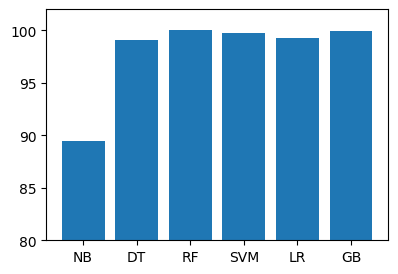

In [116]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [89.477,99.05,99.99,99.71,99.23,99.93]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [117]:
#TESTING ACCURACY

<BarContainer object of 6 artists>

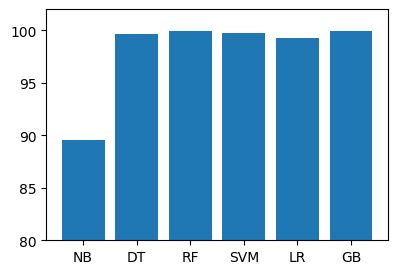

In [118]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [89.51,99.6,99.96,99.74,99.22,99.91]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(80,102)
plt.bar(names,values)

In [119]:
#TRAINING TIME

<BarContainer object of 6 artists>

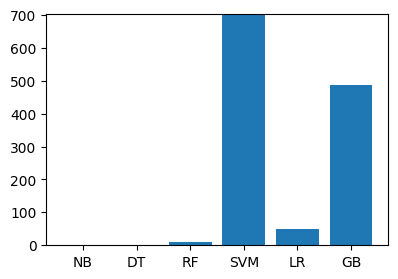

In [120]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [0.621,1.143,11.44,713.0,49.03,486.4]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(0,702)
plt.bar(names,values)

In [121]:
#TESTING TIME

<BarContainer object of 6 artists>

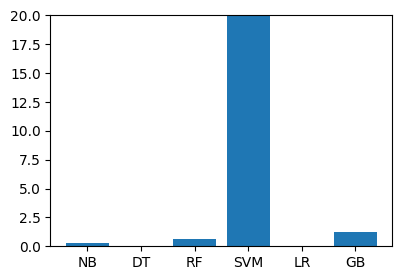

In [122]:
names = ['NB','DT','RF','SVM','LR','GB']
values = [ 0.314,0.023,0.605,198.2,0.059,1.240]
f = plt.figure(figsize=(15,3),num=10)
plt.subplot(131)
plt.ylim(0,20)
plt.bar(names,values)

In [123]:
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_auc_score

In [124]:
# Model evaluation
Y_test_pred3 = model3.predict(X_test)


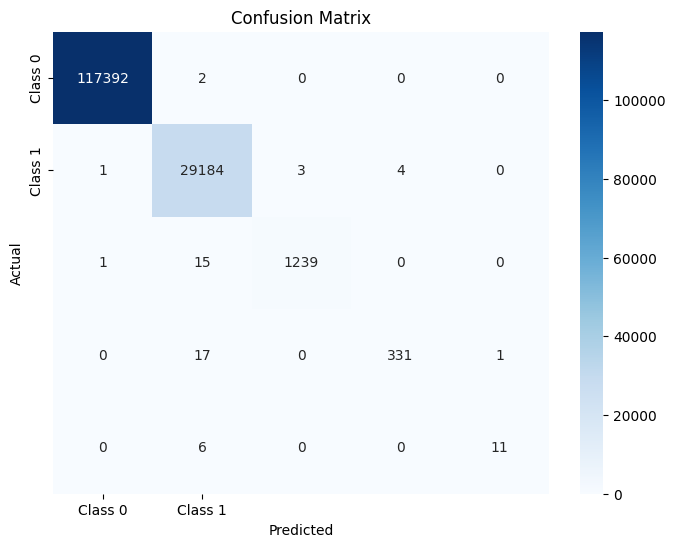

In [125]:
# Calculate confusion matrix
confusion = confusion_matrix(Y_test, Y_test_pred3)

# Define class labels
class_labels = ['Class 0', 'Class 1']

# Create a heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(confusion, annot=True, fmt="d", cmap="Blues",
            xticklabels=class_labels, yticklabels=class_labels)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

In [126]:
# Calculate accuracy score
accuracy = accuracy_score(Y_test, Y_test_pred3)
print("Accuracy:", accuracy)

Accuracy: 0.9996626340186361


In [127]:
# Calculate precision score
precision = precision_score(Y_test, Y_test_pred3, average='weighted')
print("Precision:", precision)

Precision: 0.9996587783829696


In [128]:
# Calculate recall score
recall = recall_score(Y_test, Y_test_pred3, average='weighted')
print("Recall:", recall)

Recall: 0.9996626340186361


In [129]:
# Calculate F1 score
f1 = f1_score(Y_test, Y_test_pred3, average='weighted')
print("F1 Score:", f1)

F1 Score: 0.999656798216394


In [132]:
import tkinter as tk
from tkinter import filedialog, messagebox
import pandas as pd
from tkinter import PhotoImage

def perform_prediction():
    duration = int(entry_duration.get())
    protocol_type = int(entry_protocol_type.get())
    flag = int(entry_flag.get())
    src_bytes = int(entry_src_bytes.get())
    dst_bytes = int(entry_dst_bytes.get())
    wrong_fragment = int(entry_wrong_fragment.get())
    hot = int(entry_hot.get())
    logged_in = int(entry_logged_in.get())
    num_compromised = int(entry_num_compromised.get())
    count = int(entry_count.get())
    srv_count = int(entry_srv_count.get())
    serror_rate = float(entry_serror_rate.get())
    rerror_rate = float(entry_rerror_rate.get())
    same_srv_rate = float(entry_same_srv_rate.get())
    srv_diff_host_rate = float(entry_srv_diff_host_rate.get())
    dst_host_count = int(entry_dst_host_count.get())
    dst_host_srv_count = int(entry_dst_host_srv_count.get())
    dst_host_diff_srv_rate = float(entry_dst_host_diff_srv_rate.get())
    dst_host_same_src_port_rate = float(entry_dst_host_same_src_port_rate.get())
    
    # Preprocess the input data
    input_data = [
        duration, protocol_type, flag, src_bytes, dst_bytes, wrong_fragment, hot,
        logged_in, num_compromised, count, srv_count, serror_rate, rerror_rate,
        same_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count,
        dst_host_diff_srv_rate, dst_host_same_src_port_rate
    ]
                  
    input_data = scaler.transform([input_data]) 
    prediction = model3.predict(input_data)
    messagebox.showinfo("Prediction Result", f"The predicted attack type is: {prediction[0]}")

def browse_csv_file():
    file_path = filedialog.askopenfilename(filetypes=[("CSV Files", "*.csv")])
    if file_path:
        try:
            data = pd.read_csv(file_path)
            output = tk.Listbox(window, width=47,height=40)
            output.grid(row=0, column=5, rowspan=34)
            
            # Perform prediction on each row of the DataFrame
            for _, row in df.iterrows():
                duration = int(row['duration'])
                protocol_type =int(row['protocol_type'])
                flag = int(row['flag'])
                src_bytes = int(row['src_bytes'])
                dst_bytes = int(row['dst_bytes'])
                wrong_fragment = int(row['wrong_fragment'])
                hot = int(row['hot'])
                logged_in = int(row['logged_in'])
                num_compromised = int(row['num_compromised'])
                count = int(row['count'])
                srv_count = int(row['srv_count'])
                serror_rate = float(row['serror_rate'])
                rerror_rate = float(row['rerror_rate'])
                same_srv_rate = float(row['same_srv_rate'])
                srv_diff_host_rate = float(row['srv_diff_host_rate'])
                dst_host_count = int(row['dst_host_count'])
                dst_host_srv_count = int(row['dst_host_srv_count'])
                dst_host_diff_srv_rate = float(row['dst_host_diff_srv_rate'])
                dst_host_same_src_port_rate = float(row['dst_host_same_src_port_rate'])
                
                input_data = [
                    duration, protocol_type, flag, src_bytes, dst_bytes,wrong_fragment, hot,
                    logged_in, num_compromised,count, srv_count, serror_rate, rerror_rate,
                    same_srv_rate, srv_diff_host_rate, dst_host_count, dst_host_srv_count,
                    dst_host_diff_srv_rate, dst_host_same_src_port_rate
                ]
                        
                input_data = scaler.transform([input_data]) 
                prediction = model3.predict(input_data)
                
                output.insert(0,f" The Predicted attack type: {prediction[0]}")
                    
                    
        except Exception as e:
            messagebox.showerror("Error", f"Error occurred while processing the CSV file: {str(e)}")
    else:
        messagebox.showinfo("Info", "No file selected.")
        
        
window = tk.Tk()
from PIL import Image, ImageTk
window.title("Intrusion Detection System")
window.config(background="lightblue")
img= PhotoImage(file='C:\\Users\\admin\\Desktop\\project\\bgi.png', master= window)
img_label=tk.Label(window,image=img)
img_label.place(x=0, y=0, relwidth=1, relheight=1)


def add_watermark(entry_widget, watermark_text):
    if not entry_widget.get():
        entry_widget.config(foreground='grey')
        entry_widget.insert(0, watermark_text)

def remove_watermark(event):
    entry_widget = event.widget
    if entry_widget.get() == watermark_text:
        entry_widget.config(foreground='black')
        entry_widget.delete(0, "end")

def on_button_hover(event):
    predict_button.config(bg='lightblue', fg='red', font=('Arial', 14, 'underline'))

def on_button_leave(event):
    predict_button.config(bg='red', fg='white', font=('Arial', 14, 'bold'))
    
custom_font = ('Arial', 14, 'bold')
custom_padding = {'padx': 18, 'pady': 9}
entry_width = 18

img_label.place(x=0, y=0)

label_duration = tk.Label(window, text="Duration:", font=custom_font,background='#276fc2')
label_duration.grid(row=0, column=5)
entry_duration = tk.Entry(window, width=entry_width, font=custom_font)
entry_duration.grid(row=0, column=6, **custom_padding, sticky='ew')

label_protocol_type = tk.Label(window, text="Protocol Type:", font=custom_font,background='#276fc2')
label_protocol_type.grid(row=1, column=5)
entry_protocol_type = tk.Entry(window, width=entry_width, font=custom_font)
entry_protocol_type.grid(row=1, column=6, **custom_padding, sticky='ew')

label_flag = tk.Label(window, text="Flag:", font=custom_font, background='#276fc2')
label_flag.grid(row=2, column=5)
entry_flag = tk.Entry(window, width=entry_width, font=custom_font)
entry_flag.grid(row=2, column=6, **custom_padding, sticky='ew')

label_src_bytes = tk.Label(window, text="Src Bytes:", font=custom_font, background='#276fc2')
label_src_bytes.grid(row=3, column=5)
entry_src_bytes = tk.Entry(window, width=entry_width, font=custom_font)
entry_src_bytes.grid(row=3, column=6, **custom_padding, sticky='ew')

label_dst_bytes = tk.Label(window, text="Dst Bytes:", font=custom_font, background='#276fc2')
label_dst_bytes.grid(row=4, column=5)
entry_dst_bytes = tk.Entry(window, width=entry_width, font=custom_font)
entry_dst_bytes.grid(row=4, column=6, **custom_padding, sticky='ew')
        
label_wrong_fragment = tk.Label(window, text="Wrong Fragment:", font=custom_font, background='#276fc2')
label_wrong_fragment.grid(row=6, column=5)
entry_wrong_fragment = tk.Entry(window, width=entry_width, font=custom_font)
entry_wrong_fragment.grid(row=6, column=6, **custom_padding, sticky='ew')

label_hot = tk.Label(window, text="Hot:", font=custom_font, background='#276fc2')
label_hot.grid(row=8, column=5)
entry_hot = tk.Entry(window, width=entry_width, font=custom_font)
entry_hot.grid(row=8, column=6, **custom_padding, sticky='ew')

label_logged_in = tk.Label(window, text="Logged In:", font=custom_font, background='#276fc2')
label_logged_in.grid(row=10, column=5)
entry_logged_in = tk.Entry(window, width=entry_width, font=custom_font)
entry_logged_in.grid(row=10, column=6, **custom_padding, sticky='ew')

label_num_compromised = tk.Label(window, text="Num Compromised:", font=custom_font, background='#276fc2')
label_num_compromised.grid(row=11, column=5)
entry_num_compromised = tk.Entry(window, width=entry_width, font=custom_font)
entry_num_compromised.grid(row=11, column=6, **custom_padding, sticky='ew')

label_count = tk.Label(window, text="Count:", font=custom_font, background='#276fc2')
label_count.grid(row=18, column=5)
entry_count = tk.Entry(window, width=entry_width, font=custom_font)
entry_count.grid(row=18, column=6, **custom_padding, sticky='ew')

label_srv_count = tk.Label(window, text="Srv Count:", font=custom_font, background='#276fc2')
label_srv_count.grid(row=19, column=5)
entry_srv_count = tk.Entry(window, width=entry_width, font=custom_font)
entry_srv_count.grid(row=19, column=6, **custom_padding, sticky='ew')

label_serror_rate = tk.Label(window, text="Serror Rate:", font=custom_font, background='#276fc2')
label_serror_rate.grid(row=20, column=5)
entry_serror_rate = tk.Entry(window, width=entry_width, font=custom_font)
entry_serror_rate.grid(row=20, column=6, **custom_padding, sticky='ew')

label_rerror_rate = tk.Label(window, text="Rerror Rate:", font=custom_font, background='#276fc2')
label_rerror_rate.grid(row=21, column=5)
entry_rerror_rate = tk.Entry(window, width=entry_width, font=custom_font)
entry_rerror_rate.grid(row=21, column=6, **custom_padding, sticky='ew')

label_same_srv_rate = tk.Label(window, text="Same Srv Rate:", font=custom_font, background='#276fc2')
label_same_srv_rate.grid(row=22, column=5)
entry_same_srv_rate = tk.Entry(window, width=entry_width, font=custom_font)
entry_same_srv_rate.grid(row=22, column=6, **custom_padding, sticky='ew')

label_srv_diff_host_rate = tk.Label(window, text="Srv Diff Host Rate:", font=custom_font, background='#276fc2')
label_srv_diff_host_rate.grid(row=24, column=5)
entry_srv_diff_host_rate = tk.Entry(window, width=entry_width, font=custom_font)
entry_srv_diff_host_rate.grid(row=24, column=6, **custom_padding, sticky='ew')

label_dst_host_count = tk.Label(window, text="Dst Host Count:", font=custom_font, background='#276fc2')
label_dst_host_count.grid(row=25, column=5)
entry_dst_host_count = tk.Entry(window, width=entry_width, font=custom_font)
entry_dst_host_count.grid(row=25, column=6, **custom_padding, sticky='ew')

label_dst_host_srv_count = tk.Label(window, text="Dst Host Srv Count:", font=custom_font, background='#276fc2' )
label_dst_host_srv_count.grid(row=26, column=5)
entry_dst_host_srv_count = tk.Entry(window, width=entry_width, font=custom_font)
entry_dst_host_srv_count.grid(row=26, column=6, **custom_padding, sticky='ew')

label_dst_host_diff_srv_rate = tk.Label(window, text="Dst Host Diff Srv Rate:", font=custom_font, background='#276fc2')
label_dst_host_diff_srv_rate.grid(row=27, column=5)
entry_dst_host_diff_srv_rate = tk.Entry(window, width=entry_width, font=custom_font)
entry_dst_host_diff_srv_rate.grid(row=27, column=6, **custom_padding, sticky='ew')

label_dst_host_same_src_port_rate = tk.Label(window, text="Dst Host Same Src Port Rate:", font=custom_font, background='#276fc2')
label_dst_host_same_src_port_rate.grid(row=28, column=5)
entry_dst_host_same_src_port_rate = tk.Entry(window, width=entry_width, font=custom_font)
entry_dst_host_same_src_port_rate.grid(row=28, column=6, **custom_padding, sticky='ew')


watermark_text = "Enter value..."

all_entry_widgets = [
    entry_duration, entry_protocol_type, entry_flag, entry_src_bytes, entry_dst_bytes,
    entry_wrong_fragment, entry_hot, entry_logged_in, entry_num_compromised, entry_count,
    entry_srv_count, entry_serror_rate, entry_rerror_rate, entry_same_srv_rate,
    entry_srv_diff_host_rate, entry_dst_host_count, entry_dst_host_srv_count,
    entry_dst_host_diff_srv_rate, entry_dst_host_same_src_port_rate
]

for entry_widget in all_entry_widgets:
    add_watermark(entry_widget, watermark_text)

for entry_widget in all_entry_widgets:
    entry_widget.bind("<FocusIn>", remove_watermark)
    
predict_button = tk.Button(window, text="Predict", command=perform_prediction, bg='red', fg='white', font=custom_font)
predict_button.grid(row=30, column=5, columnspan=2)

predict_button.bind("<Enter>", on_button_hover)
predict_button.bind("<Leave>", on_button_leave)

browse_button = tk.Button(window, text="Browse CSV", command=browse_csv_file, bg='blue', fg='white', font=custom_font,relief='raised')
browse_button.grid(row=30, column=6, columnspan=2)

predict_button.config(command=perform_prediction)
scaler = MinMaxScaler()
scaler.fit(X_train)

window.mainloop()